## Please complete before submission:

**Name:** Dongzhan Xie

**Student Number:** 2663048X

# TextAs Data Coursework

Please fill in this Google Colab by following the prompts from the coursework specification document and inserting your code in each relevant section.

- You should submit this notebook together with your report. (Two separate files)
- Specifcally you will submit **both a PDF with the report (so we can easily read it) and a .ipynb file containing the source code of your experiments as evidence**. Please do clean up your code where possible before submitting it.
- You may add whatever additional code and text blocks as needed (perhaps with [nice formatting](https://colab.research.google.com/notebooks/markdown_guide.ipynb)). Please keep the major headings (for the question numbers) the same.

As with labs, please remember to **Save a Copy to Drive** when you start working on this so that it is saved. Completing the labs provides essential knowledge for the successful completion of the coursework. 

## Downloading and loading Data

This code loads the prepared split of the Reddit data into training, validation and testing set.

In [ ]:
!wget -O reddit_data_split.zip https://gla-my.sharepoint.com/:u:/g/personal/jake_lever_glasgow_ac_uk/EapVNOIV84tPnQuuFBNgG9UBYIWipQ9JL4QTfSgRtIacBw?download=1
!unzip -o reddit_data_split.zip

--2022-03-08 13:20:01--  https://gla-my.sharepoint.com/:u:/g/personal/jake_lever_glasgow_ac_uk/EapVNOIV84tPnQuuFBNgG9UBYIWipQ9JL4QTfSgRtIacBw?download=1
Resolving gla-my.sharepoint.com (gla-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to gla-my.sharepoint.com (gla-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/jake_lever_glasgow_ac_uk/Documents/Teaching/reddit_data_split.zip [following]
--2022-03-08 13:20:02--  https://gla-my.sharepoint.com/personal/jake_lever_glasgow_ac_uk/Documents/Teaching/reddit_data_split.zip
Reusing existing connection to gla-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 468327 (457K) [application/x-zip-compressed]
Saving to: ‘reddit_data_split.zip’

reddit_data_split.z 100%[===================>] 457.35K  1.50MB/s    in 0.3s    

2022-03-08 13:20:02 (1.50 MB/s) - ‘reddit_data_split.zip’ saved [468327/468327]

Archive:  reddit_data_split.zip
  i

In [ ]:
import json

with open('reddit_train.json') as f:
    train_data = json.load(f)
with open('reddit_val.json') as f:
    validation_data = json.load(f)
with open('reddit_test.json') as f:
    test_data = json.load(f)

print("Number of posts in training data:", len(train_data))
print("Number of posts in validation data:", len(validation_data))
print("Number of posts in test data:", len(test_data))

Number of posts in training data: 1200
Number of posts in validation data: 400
Number of posts in test data: 400


## Q1:

### Q1a:

Train value's value count
tea               146
NintendoSwitch    145
PS4               142
Coffee            136
pcgaming          135
HydroHomies       134
xbox              132
antiMLM           128
Soda              102
Name: subreddit, dtype: int64
Validation value's value count
antiMLM           54
NintendoSwitch    52
tea               48
Soda              43
PS4               43
pcgaming          43
Coffee            42
HydroHomies       38
xbox              37
Name: subreddit, dtype: int64
Test value's value count
Coffee            56
NintendoSwitch    52
PS4               48
pcgaming          47
xbox              44
antiMLM           44
tea               42
HydroHomies       38
Soda              29
Name: subreddit, dtype: int64
Train data's standard deviation
12.445436468396315
Validation data's standard deviation
5.479479113750201
Test data's standard deviation
7.425348642934943


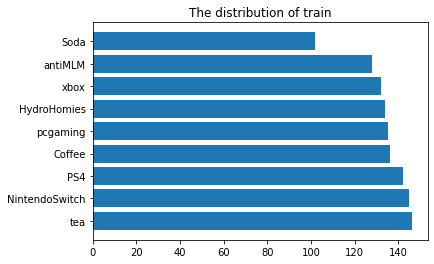

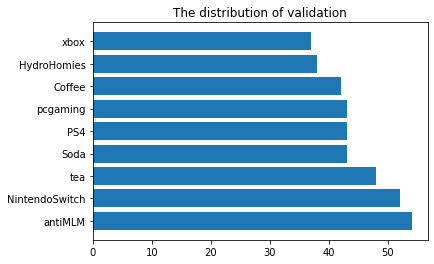

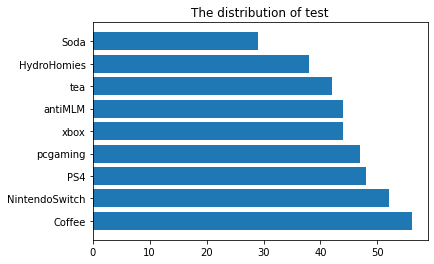

In [ ]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
# Convert the data from json to dataframe
train_data_df = pd.json_normalize(train_data)
validation_data_df = pd.json_normalize(validation_data)
test_data_df = pd.json_normalize(test_data)

# Get the Label and their account
train_valuecount = train_data_df["subreddit"].value_counts()
validation_valuecount = validation_data_df["subreddit"].value_counts()
test_valuecount = test_data_df["subreddit"].value_counts()

print("Train value's value count")
print(train_valuecount)
print("Validation value's value count")
print(validation_valuecount)
print("Test value's value count")
print(test_valuecount)

train_std = np.std(train_valuecount)
validation_std = np.std(validation_valuecount)
test_std = np.std(test_valuecount)
print("Train data's standard deviation")
print(train_std)
print("Validation data's standard deviation")
print(validation_std)
print("Test data's standard deviation")
print(test_std)
def draw_bar(input, name):
  label = list(input.index)
  data = np.array(input)
  plt.title("The distribution of " + name)
  plt.barh(range(len(data)), data, tick_label=label)
  plt.show()

draw_bar(train_valuecount, "train")
draw_bar(validation_valuecount, "validation")
draw_bar(test_valuecount, "test")



### Q1b:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Set the One Hot vectorizer
one_hot_vectorizer = CountVectorizer(binary=True)


validation_body_features = validation_data_df['body']
test_body_features = test_data_df['body']
train_body_features = train_data_df['body']

# Get the one hot feature
validation_features_OneHot = one_hot_vectorizer.fit_transform(validation_data_df['body'].tolist())
test_features_OneHot = one_hot_vectorizer.transform(test_data_df['body'].tolist())
train_features_OneHot = one_hot_vectorizer.transform(train_data_df['body'].tolist())


In [ ]:
# Set TFIDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
TF_IDF_transformer = TfidfVectorizer()

validation_tfidf= TF_IDF_transformer.fit_transform(validation_data_df['body'].tolist())
train_tfidf = TF_IDF_transformer.transform(train_data_df['body'].tolist())
test_tfidf = TF_IDF_transformer.transform(test_data_df['body'].tolist())

In [ ]:
# Set Labels

train_labels = train_data_df['subreddit']
validation_labels = validation_data_df['subreddit']
test_labels = test_data_df['subreddit']

In [ ]:
# Set the evalution Function
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

def evaluation_summary(description, true_labels, predictions):
  print("Evaluation for: " + description)
  print(classification_report(true_labels, predictions,  digits=3, zero_division=0))
  print('\nConfusion matrix:\n',confusion_matrix(true_labels, predictions)) # Note the order here is true, predicted

In [ ]:
# Dummy_Onehot with most frequent

from sklearn.dummy import DummyClassifier

dummy_mf = DummyClassifier(strategy='most_frequent')
dummy_mf.fit(train_body_features, train_labels)
print(dummy_mf.score(test_body_features, test_labels))

dummy_mf_predicted_labels = dummy_mf.predict(test_body_features)
evaluation_summary("Dummy Majority", test_labels, dummy_mf_predicted_labels)

0.105
Evaluation for: Dummy Majority
                precision    recall  f1-score   support

        Coffee      0.000     0.000     0.000        56
   HydroHomies      0.000     0.000     0.000        38
NintendoSwitch      0.000     0.000     0.000        52
           PS4      0.000     0.000     0.000        48
          Soda      0.000     0.000     0.000        29
       antiMLM      0.000     0.000     0.000        44
      pcgaming      0.000     0.000     0.000        47
           tea      0.105     1.000     0.190        42
          xbox      0.000     0.000     0.000        44

      accuracy                          0.105       400
     macro avg      0.012     0.111     0.021       400
  weighted avg      0.011     0.105     0.020       400


Confusion matrix:
 [[ 0  0  0  0  0  0  0 56  0]
 [ 0  0  0  0  0  0  0 38  0]
 [ 0  0  0  0  0  0  0 52  0]
 [ 0  0  0  0  0  0  0 48  0]
 [ 0  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 44  0]
 [ 0  0  0  0  0  0  0 47  0]
 [

In [ ]:
dummy_prior = DummyClassifier(strategy='stratified')
dummy_prior.fit(train_body_features, train_labels)
print(dummy_prior.score(test_body_features, test_labels))

dummy_prior_predicted_labels = dummy_prior.predict(test_body_features)
evaluation_summary("Dummy Prior", test_labels, dummy_prior_predicted_labels)

0.1
Evaluation for: Dummy Prior
                precision    recall  f1-score   support

        Coffee      0.081     0.054     0.065        56
   HydroHomies      0.071     0.079     0.075        38
NintendoSwitch      0.172     0.192     0.182        52
           PS4      0.191     0.188     0.189        48
          Soda      0.000     0.000     0.000        29
       antiMLM      0.086     0.068     0.076        44
      pcgaming      0.122     0.128     0.125        47
           tea      0.070     0.071     0.071        42
          xbox      0.132     0.159     0.144        44

      accuracy                          0.110       400
     macro avg      0.103     0.104     0.103       400
  weighted avg      0.109     0.110     0.109       400


Confusion matrix:
 [[ 3  9  5  5  8  4  8  9  5]
 [ 3  3  7  5  4  3  4  3  6]
 [ 3  6 10  5  3  5  6  8  6]
 [ 5  3  7  9  4  5  8  1  6]
 [ 5  4  2  4  0  4  2  5  3]
 [ 5  3  7  7  5  3  4  6  4]
 [ 4  4  6  4  4  6  6  5  8]
 [ 5  2

In [ ]:
# LR for OneHot
from sklearn.linear_model import LogisticRegression

lr_oneHot = LogisticRegression()

lr_oneHot_model = lr_oneHot.fit(train_features_OneHot, train_labels)

lr_oneHot_predicted_labels = lr_oneHot_model.predict(test_features_OneHot)

evaluation_summary("LR onehot", test_labels, lr_oneHot_predicted_labels)
# print(lr_oneHot_predicted_labels)


Evaluation for: LR onehot
                precision    recall  f1-score   support

        Coffee      0.789     0.804     0.796        56
   HydroHomies      0.833     0.921     0.875        38
NintendoSwitch      0.608     0.596     0.602        52
           PS4      0.483     0.604     0.537        48
          Soda      0.636     0.724     0.677        29
       antiMLM      0.829     0.659     0.734        44
      pcgaming      0.514     0.404     0.452        47
           tea      0.778     0.833     0.805        42
          xbox      0.575     0.523     0.548        44

      accuracy                          0.667       400
     macro avg      0.672     0.674     0.670       400
  weighted avg      0.669     0.667     0.665       400


Confusion matrix:
 [[45  0  3  1  2  0  1  4  0]
 [ 1 35  1  1  0  0  0  0  0]
 [ 1  1 31  4  1  1  6  1  6]
 [ 1  1  5 29  2  0  4  0  6]
 [ 1  1  0  2 21  1  1  2  0]
 [ 2  2  1  4  0 29  2  1  3]
 [ 1  1  8 10  3  2 19  1  2]
 [ 4  0  0  0

In [ ]:
# LR for TF_IDF
from sklearn.linear_model import LogisticRegression


lr_TF_IDF = LogisticRegression()

lr_TF_IDF_model = lr_TF_IDF.fit(train_tfidf, train_labels)

lr_TF_IDF_predicted_labels = lr_TF_IDF_model.predict(test_tfidf)

evaluation_summary("LR TDIDF", test_labels, lr_TF_IDF_predicted_labels)

Evaluation for: LR TDIDF
                precision    recall  f1-score   support

        Coffee      0.925     0.875     0.899        56
   HydroHomies      0.879     0.763     0.817        38
NintendoSwitch      0.690     0.769     0.727        52
           PS4      0.542     0.667     0.598        48
          Soda      0.788     0.897     0.839        29
       antiMLM      0.822     0.841     0.831        44
      pcgaming      0.585     0.511     0.545        47
           tea      0.881     0.881     0.881        42
          xbox      0.778     0.636     0.700        44

      accuracy                          0.755       400
     macro avg      0.766     0.760     0.760       400
  weighted avg      0.762     0.755     0.756       400


Confusion matrix:
 [[49  1  0  0  2  0  1  3  0]
 [ 0 29  2  2  1  3  1  0  0]
 [ 0  1 40  4  1  1  2  0  3]
 [ 0  0  6 32  1  0  6  0  3]
 [ 0  0  0  2 26  0  0  1  0]
 [ 1  1  0  2  0 37  2  0  1]
 [ 0  1  7 11  0  2 24  1  1]
 [ 2  0  0  0 

In [ ]:
# SVC Model
from sklearn.svm import SVC

svc=SVC(kernel='rbf')

svc_model = svc.fit(train_features_OneHot,train_labels)

svc_predicted_labels = svc_model.predict(test_features_OneHot)

evaluation_summary("SVC with One Hot", test_labels, svc_predicted_labels)
# print(lr_oneHot_predicted_labels)


Evaluation for: SVC with One Hot
                precision    recall  f1-score   support

        Coffee      0.885     0.821     0.852        56
   HydroHomies      0.769     0.789     0.779        38
NintendoSwitch      0.630     0.654     0.642        52
           PS4      0.354     0.583     0.441        48
          Soda      0.656     0.724     0.689        29
       antiMLM      0.604     0.659     0.630        44
      pcgaming      0.481     0.277     0.351        47
           tea      0.919     0.810     0.861        42
          xbox      0.688     0.500     0.579        44

      accuracy                          0.642       400
     macro avg      0.665     0.646     0.647       400
  weighted avg      0.664     0.642     0.644       400


Confusion matrix:
 [[46  0  1  1  2  3  1  2  0]
 [ 2 30  2  1  1  2  0  0  0]
 [ 0  1 34  6  1  2  5  0  3]
 [ 0  1  5 28  3  2  5  0  4]
 [ 2  1  0  5 21  0  0  0  0]
 [ 0  3  0  9  0 29  1  0  2]
 [ 0  3  9 16  1  3 13  1  1]
 [ 2  

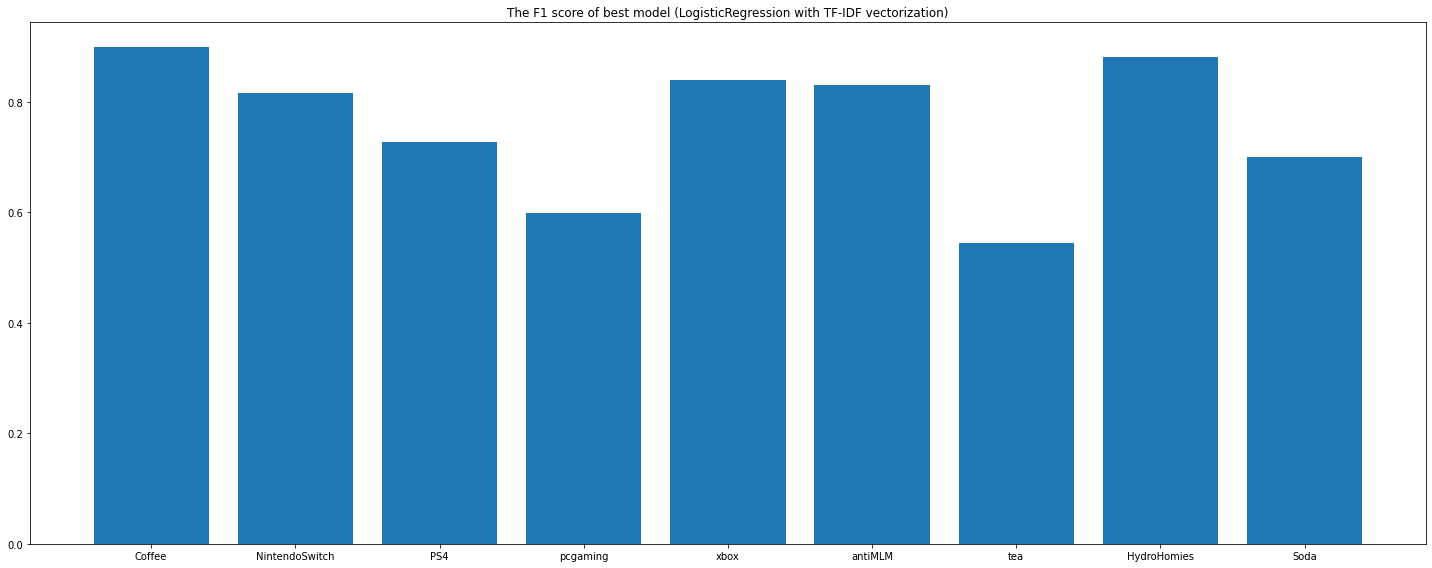

In [ ]:
# Draw best model's 
best_F1 = [0.899, 0.817, 0.727, 0.598, 0.839, 0.831, 0.545, 0.881, 0.700]
best_Label = list(test_valuecount.index)
plt.figure(figsize=(20, 8))
plt.title("The F1 score of best model (LogisticRegression with TF-IDF vectorization)")
plt.bar(range(len(best_F1)), best_F1, tick_label=best_Label)
plt.tight_layout()
plt.show()



### Q1c:

In [ ]:
# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15)
knn_model = knn.fit(train_tfidf,train_labels)
knn_predicted_labels = knn_model.predict(test_tfidf)
evaluation_summary("K-Nearest Neighbor", test_labels, knn_predicted_labels)

Evaluation for: K-Nearest Neighbor
                precision    recall  f1-score   support

        Coffee      0.902     0.821     0.860        56
   HydroHomies      0.853     0.763     0.806        38
NintendoSwitch      0.455     0.865     0.596        52
           PS4      0.568     0.438     0.494        48
          Soda      0.864     0.655     0.745        29
       antiMLM      0.603     0.864     0.710        44
      pcgaming      0.421     0.170     0.242        47
           tea      0.810     0.810     0.810        42
          xbox      0.667     0.500     0.571        44

      accuracy                          0.655       400
     macro avg      0.682     0.654     0.648       400
  weighted avg      0.671     0.655     0.642       400


Confusion matrix:
 [[46  2  0  1  1  3  0  3  0]
 [ 0 29  1  0  0  7  0  1  0]
 [ 0  0 45  1  1  1  3  0  1]
 [ 1  1 18 21  0  2  2  0  3]
 [ 2  1  2  0 19  0  1  1  3]
 [ 0  0  1  1  0 38  3  0  1]
 [ 0  0 25  6  0  3  8  2  3]
 [ 0

## Q2:

### Q2a:

best feature 2140
F1 0.7810964484391508


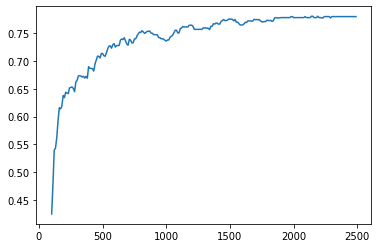

In [ ]:
# Tuning with the max feature
best_feature = 0
best_score = 0
score = np.array([])

for i in range(10, 250):

  TF_IDF_transformer_new = TfidfVectorizer(binary=True, sublinear_tf=True, max_features=i*10)
  validation_tfidf_new= TF_IDF_transformer_new.fit_transform(validation_data_df['body'].tolist())
  train_tfidf_new = TF_IDF_transformer_new.transform(train_data_df['body'].tolist())
  test_tfidf_new = TF_IDF_transformer_new.transform(test_data_df['body'].tolist())

  lr_TF_IDF_new = LogisticRegression()

  lr_TF_IDF_model_new = lr_TF_IDF_new.fit(train_tfidf_new, train_labels)

  lr_TF_IDF_predicted_labels_new = lr_TF_IDF_model_new.predict(validation_tfidf_new)

  current_score =  fbeta_score(validation_labels,lr_TF_IDF_predicted_labels_new, average='weighted', beta=0.5)
  score = np.append(score, current_score)
  if current_score > best_score:
    best_score = current_score
    best_feature = i * 10

print("best feature " + str(best_feature))
print("F1 " + str(best_score))

plt.plot(np.arange(100, 2500, 10), score)
plt.show()

# evaluation_summary("LR TDIDF new", validation_labels, lr_TF_IDF_predicted_labels_new, list(train_valuecount.index))
# print(lr_TF_IDF_predicted_labels)

best feature 0.6000000000000001
F1 0.7891959058456567


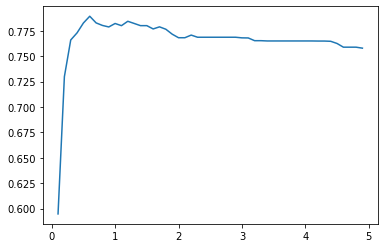

In [ ]:
best_feature = 0
best_score = 0
score = np.array([])
TF_IDF_transformer_new = TfidfVectorizer(binary=True, sublinear_tf=True, max_features = 2790)
validation_tfidf_new= TF_IDF_transformer_new.fit_transform(validation_data_df['body'].tolist())
train_tfidf_new = TF_IDF_transformer_new.transform(train_data_df['body'].tolist())
test_tfidf_new = TF_IDF_transformer_new.transform(test_data_df['body'].tolist())

for i in range(1, 50):

  lr_TF_IDF_new = LogisticRegression(C = 10**-1 * i)

  lr_TF_IDF_model_new = lr_TF_IDF_new.fit(train_tfidf_new, train_labels)

  lr_TF_IDF_predicted_labels_new = lr_TF_IDF_model_new.predict(validation_tfidf_new)

  current_score =  fbeta_score(validation_labels,lr_TF_IDF_predicted_labels_new, average='weighted', beta=0.5)
  score = np.append(score, current_score)
  if current_score > best_score:
    best_score = current_score
    best_feature = i * 0.1

print("best feature " + str(best_feature))
print("F1 " + str(best_score))
# 7.4 Increase the number of iterations (max_iter) or scale the data as shown in:
plt.plot(np.arange(10**-1, 5, 10**-1), score)
plt.show()


In [ ]:
from sklearn.pipeline import Pipeline

prediction_pipeline = Pipeline([
              ('tfidf', TfidfVectorizer()),
              ('logreg', LogisticRegression())
              ])
prediction_pipeline.fit(train_data_df['body'].tolist(), train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('logreg', LogisticRegression())])

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
   'tfidf__sublinear_tf' : (True, False),
   'tfidf__max_features' : np.append(np.arange(1900, 2200, 100), None),
   'logreg__C' : [0.4, 0.5, 0.6],
   'logreg__solver' : ['lbfgs', 'liblinear', 'sag', 'saga']

}
grid_search = GridSearchCV(prediction_pipeline, param_grid=params, n_jobs=1, verbose=1, scoring='f1_weighted', cv = 5)
print("Performing grid search...")
print("pipeline:", [name for name, _ in prediction_pipeline.steps])
print("parameters:")
print(params)
grid_search.fit(train_data_df['body'].tolist(), train_labels)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(params.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))


Performing grid search...
pipeline: ['tfidf', 'logreg']
parameters:
{'tfidf__sublinear_tf': (True, False), 'tfidf__max_features': array([1900, 2000, 2100, None], dtype=object), 'logreg__C': [0.4, 0.5, 0.6], 'logreg__solver': ['lbfgs', 'liblinear', 'sag', 'saga']}
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best score: 0.751
Best parameters set:
	logreg__C: 0.6
	logreg__solver: 'saga'
	tfidf__max_features: 2100
	tfidf__sublinear_tf: True


In [ ]:
# Tuning
# Set TFIDF vectorizer

TF_IDF_transformer_new = TfidfVectorizer(sublinear_tf=True, max_features = 2100)
validation_tfidf_new = TF_IDF_transformer_new.fit_transform(validation_data_df['body'].tolist())
train_tfidf_new = TF_IDF_transformer_new.transform(train_data_df['body'].tolist())
test_tfidf_new = TF_IDF_transformer_new.transform(test_data_df['body'].tolist())

lr_TF_IDF = LogisticRegression(solver ='saga', C = 0.6)

lr_TF_IDF_model = lr_TF_IDF.fit(train_tfidf_new, train_labels)

lr_TF_IDF_predicted_labels = lr_TF_IDF_model.predict(test_tfidf_new)

evaluation_summary("LR TDIDF with tuning", test_labels, lr_TF_IDF_predicted_labels)

Evaluation for: LR TDIDF with tuning
                precision    recall  f1-score   support

        Coffee      0.943     0.893     0.917        56
   HydroHomies      0.938     0.789     0.857        38
NintendoSwitch      0.639     0.750     0.690        52
           PS4      0.525     0.646     0.579        48
          Soda      0.800     0.828     0.814        29
       antiMLM      0.783     0.818     0.800        44
      pcgaming      0.730     0.574     0.643        47
           tea      0.881     0.881     0.881        42
          xbox      0.750     0.682     0.714        44

      accuracy                          0.760       400
     macro avg      0.777     0.762     0.766       400
  weighted avg      0.772     0.760     0.763       400


Confusion matrix:
 [[50  0  1  0  2  0  0  3  0]
 [ 0 30  2  2  1  3  0  0  0]
 [ 0  1 39  5  1  1  1  0  4]
 [ 0  0  7 31  1  1  5  0  3]
 [ 0  0  0  4 24  0  0  1  0]
 [ 0  1  0  3  0 36  2  0  2]
 [ 0  0  8  7  0  3 27  1  1]
 [

### Q2b:

## Q3:

### Q3a:

In [ ]:
TF_IDF_transformer_new = TfidfVectorizer(sublinear_tf=True, max_features = 2100)
validation_tfidf_new = TF_IDF_transformer_new.fit_transform((validation_data_df['body'] + validation_data_df['author'] + validation_data_df['title']).tolist())
train_tfidf_new = TF_IDF_transformer_new.transform((train_data_df['body'] + train_data_df['author'] + train_data_df['title']).tolist())
test_tfidf_new = TF_IDF_transformer_new.transform((test_data_df['body'] + test_data_df['author'] + test_data_df['title']).tolist())

lr_TF_IDF = LogisticRegression(solver ='saga', C = 0.6)

lr_TF_IDF_model = lr_TF_IDF.fit(train_tfidf_new, train_labels)

lr_TF_IDF_predicted_labels_f1 = lr_TF_IDF_model.predict(test_tfidf_new)

evaluation_summary("LR TDIDF with tuning", test_labels, lr_TF_IDF_predicted_labels_f1)

Evaluation for: LR TDIDF with tuning
                precision    recall  f1-score   support

        Coffee      0.963     0.929     0.945        56
   HydroHomies      0.941     0.842     0.889        38
NintendoSwitch      0.786     0.846     0.815        52
           PS4      0.614     0.729     0.667        48
          Soda      0.867     0.897     0.881        29
       antiMLM      0.812     0.886     0.848        44
      pcgaming      0.705     0.660     0.681        47
           tea      0.950     0.905     0.927        42
          xbox      0.892     0.750     0.815        44

      accuracy                          0.825       400
     macro avg      0.837     0.827     0.830       400
  weighted avg      0.833     0.825     0.827       400


Confusion matrix:
 [[52  1  0  0  1  0  1  1  0]
 [ 0 32  0  2  0  4  0  0  0]
 [ 0  0 44  4  0  1  2  0  1]
 [ 0  0  4 35  2  0  6  0  1]
 [ 0  0  1  2 26  0  0  0  0]
 [ 0  1  0  1  0 39  1  1  1]
 [ 0  0  6  7  0  2 31  0  1]
 [

In [ ]:
import spacy
import nltk

nlp = spacy.load('en_core_web_sm', disable=['ner'])
nlp.remove_pipe('tagger')
nlp.remove_pipe('parser')
nltk.download('stopwords')

def text_pipeline_spacy(text):
    tokens = []
    doc = nlp(text)
    for t in doc:
        if not t.is_stop and not t.is_punct and not t.is_space:
            tokens.append(t.lemma_.lower())
    return tokens


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
TF_IDF_transformer_new = TfidfVectorizer(tokenizer=text_pipeline_spacy, sublinear_tf=True, max_features = 2100)
validation_tfidf_new = TF_IDF_transformer_new.fit_transform((validation_data_df['body'] + ' ' + validation_data_df['author'] + ' ' + validation_data_df['title']).tolist())
train_tfidf_new = TF_IDF_transformer_new.transform((train_data_df['body'] + ' ' + train_data_df['author'] + ' ' + train_data_df['title']).tolist())
test_tfidf_new = TF_IDF_transformer_new.transform((test_data_df['body'] + ' ' + test_data_df['author'] + ' ' + test_data_df['title']).tolist())

lr_TF_IDF = LogisticRegression(solver ='saga', C = 0.6)

lr_TF_IDF_model = lr_TF_IDF.fit(train_tfidf_new, train_labels)

lr_TF_IDF_predicted_labels_f2 = lr_TF_IDF_model.predict(test_tfidf_new)

evaluation_summary("LR TDIDF with tuning", test_labels, lr_TF_IDF_predicted_labels_f2)

Evaluation for: LR TDIDF with tuning
                precision    recall  f1-score   support

        Coffee      1.000     0.929     0.963        56
   HydroHomies      0.919     0.895     0.907        38
NintendoSwitch      0.830     0.846     0.838        52
           PS4      0.691     0.792     0.738        48
          Soda      0.875     0.966     0.918        29
       antiMLM      0.816     0.909     0.860        44
      pcgaming      0.698     0.638     0.667        47
           tea      0.976     0.952     0.964        42
          xbox      0.921     0.795     0.854        44

      accuracy                          0.853       400
     macro avg      0.858     0.858     0.856       400
  weighted avg      0.857     0.853     0.853       400


Confusion matrix:
 [[52  1  0  0  2  0  1  0  0]
 [ 0 34  0  1  1  2  0  0  0]
 [ 0  0 44  5  0  0  2  0  1]
 [ 0  0  1 38  0  1  7  0  1]
 [ 0  0  0  0 28  0  1  0  0]
 [ 0  2  0  1  0 40  0  1  0]
 [ 0  0  7  5  0  4 30  0  1]
 [

### Q3b:

In [ ]:
! pip install seaborn

In [29]:
# With tuning
TF_IDF_transformer_new = TfidfVectorizer(sublinear_tf=True, max_features = 2100)
validation_tfidf_new = TF_IDF_transformer_new.fit_transform(validation_data_df['body'].tolist())
train_tfidf_new = TF_IDF_transformer_new.transform(train_data_df['body'].tolist())
test_tfidf_new = TF_IDF_transformer_new.transform(test_data_df['body'].tolist())

lr_TF_IDF = LogisticRegression(solver ='saga', C = 0.6)

lr_TF_IDF_model = lr_TF_IDF.fit(train_tfidf_new, train_labels)

lr_TF_IDF_predicted_labels_tuning = lr_TF_IDF_model.predict(test_tfidf_new)

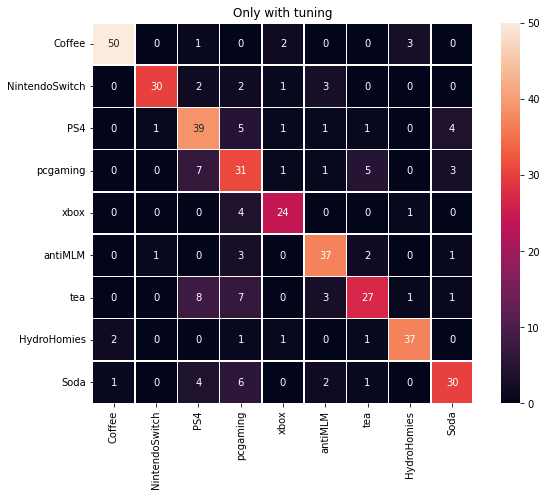

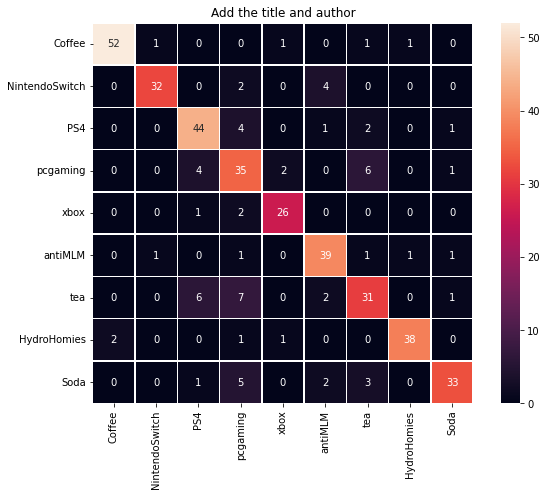

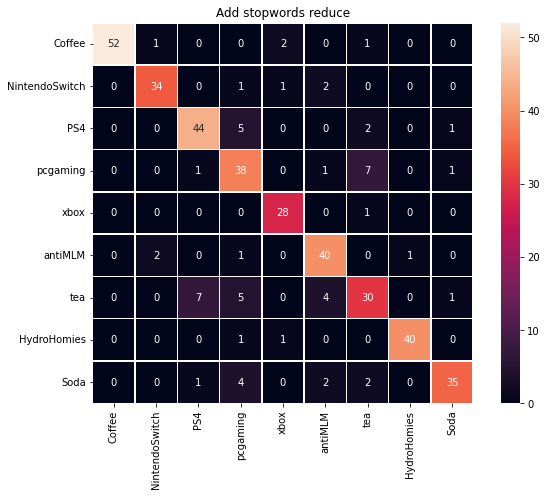

In [30]:
import seaborn as sns

tuning = confusion_matrix(test_labels, lr_TF_IDF_predicted_labels_tuning)
F1 = confusion_matrix(test_labels, lr_TF_IDF_predicted_labels_f1)
F2 = confusion_matrix(test_labels, lr_TF_IDF_predicted_labels_f2)
label = list(test_valuecount.index)

f, ax = plt.subplots(figsize=(10, 7))
plt.xticks(rotation='90')
plt.title("Only with tuning")
sns.heatmap(tuning, square=True, linewidths=.5, annot=True, yticklabels = label, xticklabels = label)
plt.show()

f, ax = plt.subplots(figsize=(10, 7))
plt.xticks(rotation='90')
plt.title("Add the title and author")
sns.heatmap(F1, square=True, linewidths=.5, annot=True, yticklabels = label, xticklabels = label)
plt.show()

f, ax = plt.subplots(figsize=(10, 7))
plt.xticks(rotation='90')
plt.title("Add stopwords reduce")
sns.heatmap(F2, square=True, linewidths=.5, annot=True, yticklabels = label, xticklabels = label)
plt.show()

### Q3c: